In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
KEYS = [
    'entity_id',
    'financial_report_id',
    'financial_statement_id',
    'entity_ico',
    'entity_name']

DIMENSIONS = [
    'year',
    # 'month',
    # 'financial_report_order_number',
    'period_length',
    # 'consolidated',
    # 'approved_date',
    'type',
    'financial_report_template_id',
    # 'establishment_date',
    # 'cancellation_date',
    # 'sknace_code',
    # 'entity_state',
    'legal_form_code',
    'org_size_code',
    'ownership_category_code',
    'entity_consolidated',
    # 'sknace_division_name',
    'sknace_division',
    # 'sknace_subcategory',
    'sal_class',
    'is_outlier']

RAW_VALUES = [ 
    'total_assets',
    'non_current_assets',
    'non_current_intangible_assets',
    'non_current_tangible_assets',
    'non_current_financial_assets',
    'current_assets',
    'inventories',
    'non_current_receivables',
    'current_receivables',
    'financial_assets',
    'current_financial_assets',
    'cash_and_bank_balances',
    'total_equity_and_liabilities',
    'equity',
    'share_capital',
    'share_premium',
    'net_profit_of_previous_years',
    'net_profit_after_tax',
    'liabilities',
    'non_current_liabilities',
    'long_term_provisions',
    'long_term_bank_loans',
    'current_liabilities',
    'short_term_provisions',
    'current_bank_loans',
    'short_term_financial_assistance',
    'operating_revenues',
    'sales_from_the_merchandise',
    'sales_from_the_own_products_and_services',
    'sales_from_the_other',
    'other_revenues_from_operating_activities',
    'operating_costs',
    'costs_of_merchandise_sold',
    'consumed_materials_energy_non_inventory_supplies',
    'services',
    'personnel_costs',
    'taxes_and_fees',
    'depreciation',
    'remaining_cost_of_sold_long_term_assets_and_materials',
    'adjustments_to_receivables',
    'other_costs_of_operating_activities',
    'operating_result',
    'value_added',
    'revenues_from_financial_activities',
    'cost_of_financial_activities',
    'result_from_fincancial_activities',
    'result_before_tax',
    'income_tax',
    'result_after_tax']

PRIMARY_VALUES = [
    'CA',
    'CASH',
    'CL',
    'EQ',
    'NCL',
    'TA',
    'TL',
    'CC',
    'INV',
    'CF_NETTO',
    'CF_SELFFIN',
    'EAT',
    'EBIT',
    'SAL',
    'COST',
    'INT',
    'YIE',
    'LABOR']

RATIOS = [
    'L3',
    'L2',
    'L1',
    'CF_CL',
    'CASH_TA',
    'SAL_TA',
    'TL_SAL',
    'INV_COST',
    'INV_SAL',
    'CC_SAL',
    'TA_SAL',
    'TL_TA',
    'CF_TL',
    'CL_TA',
    'NCL_TA',
    'EQ_TL',
    'EQ_TA',
    'CL_CC',
    'ROE',
    'EAT_TA',
    'ROA_BRUTTO',
    'CF_TA',
    'CF_SAL',
    'ROS',
    'EAT_YIE',
    'ROI',
    'ROA_NETTO',
    'LABOR_PRODUCTIVITY']

DISTRESS_SIGNALS = [
    'DPHZ_vat_registration_cancelled',
    'DPHZ_vat_registration_cancelled_1y_off',
    'DPHZ_vat_registration_cancelled_2y_off',
    'DPHZ_vat_registration_cancelled_3y_off',
    'RU_event',
    'RU_event_1y_off',
    'RU_event_2y_off',
    'RU_event_3y_off',
    'cancellation_year',
    'RUZ_cancelled',
    'RUZ_cancelled_1y_off',
    'RUZ_cancelled_2y_off',
    'RUZ_cancelled_3y_off']

In [3]:
data_raw = pd.read_csv('../../DATA/FINAL/training_sample.csv')
test_data_raw = pd.read_csv('../../DATA/FINAL/testing_sample.csv')
data_raw

,entity_id,year,month,financial_report_id,financial_report_template_id,CA,CASH,CL,EQ,NCL,TA,TL,CC,INV,CF_NETTO,CF_SELFFIN,EAT,EBIT,SAL,COST,INT,YIE,LABOR,L3,L2,L1,CF_CL,CASH_TA,SAL_TA,TL_SAL,INV_COST,INV_SAL,CC_SAL,TA_SAL,TL_TA,CF_TL,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,financial_statement_id,financial_report_order_number,entity_ico,period_length,consolidated,approved_date,type,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,legal_form_code,org_size_code,ownership_category_code,entity_consolidated,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,DPHZ_vat_registration_cancelled_3y_off,RU_event,RU_event_1y_off,RU_event_2y_off,RU_event_3y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,RUZ_cancelled_3y_off,sal_class,establishment_year,is_outlier,RUZ_indirect_criteria,RUZ_indirect_criteria_1y_off,RUZ_indirect_criteria_2y_off,RUZ_indirect_criteria_3y_off,combined_issue_criteria_1y_off,combined_issue_criteria_2y_off,combined_issue_criteria_3y_off,plausible_sample
0,27971.0,2018.0,1.0,6791492,699.0,824851.0,137120.0,564418.0,17376.0,46374.0,875393.0,846466.0,673298.0,11072.0,13087.0,9028.0,2651.0,6710.0,3031963.0,3007396.0,8218.0,3031970.0,370870.0,1.461419,1.435847,0.242941,0.023187,0.156638,3.463545,0.279181,1.325373,1.314633,0.222067,103.939751,0.966955,0.015461,0.644760,0.052975,0.020528,0.019849,1.816500,0.838289,0.152567,0.003028,0.007665,0.014950,0.004316,0.000874,0.000874,0.012416,0.003028,0.122320,4101516.0,1.0,652423.0,12.0,NaN,2019-06-28,Riadna,KUHO - mix. spol. s r.o.,1991-06-25,NaN,49410.0,NaN,112.0,2.0,2.0,False,Pozemná doprava a doprava potrubím,H,49.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,1991,False,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,71752.0,2015.0,1.0,5058691,699.0,912862.0,2213.0,48840.0,2399.0,18406.0,948368.0,945969.0,910649.0,0.0,-35846.0,-38726.0,-57122.0,-54242.0,2134583.0,2202672.0,67110.0,2179262.0,12114.0,18.690868,18.690868,0.045311,-0.733948,0.002333,2.250796,0.443163,0.000000,0.000000,0.426617,159.943408,0.997470,-0.037893,0.051499,0.019408,0.002536,0.002530,0.191745,0.053632,-23.810754,-0.060232,-0.057195,-0.037798,-0.016793,-0.026760,-0.026212,0.010532,-0.060232,0.005675,2703097.0,1.0,36584649.0,12.0,NaN,2016-03-10,Riadna,FeCom s.r.o.,2004-10-08,NaN,46720.0,NaN,112.0,0.0,8.0,False,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,True,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,72912.0,2017.0,1.0,6351388,699.0,1481047.0,1630.0,1326396.0,-718007.0,549510.0,1521883.0,2239890.0,1417869.0,61548.0,47298.0,44418.0,10312.0,13192.0,4512342.0,4460274.0,32121.0,4512573.0,692228.0,1.116595,1.070192,0.001229,0.035659,0.001071,2.964973,0.496392,4.967695,4.910372,0.314220,121.417632,1.471789,0.021116,0.871549,0.361072,-0.320555,-0.471789,1.410697,0.935486,-0.014362,0.006776,0.008668,0.031079,0.010482,0.002285,0.002285,0.027882,0.006776,0.153408,3748560.0,1.0,35904798.0,12.0,NaN,2018-06-21,Riadna,"WETRON, s.r.o.",2004-10-23,NaN,33200.0,NaN,112.0,0.0,8.0,False,Oprava a inštalácia strojov a prístrojov,C,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,True,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,81349.0,2017.0,1.0,6370373,699.0,514945.0,13348.0,82348.0,597059.0,278564.0,1595777.0,998718.0,501597.0,0.0,339656.0,326252.0,46443.0,59847.0,2017657.0,1883181.0,34235.0,2017735.0,250683.0,6.253279,6.253279,0.162093,4.124642,0.008365,1.264373,0.494989,0.000000,0.000000,0.248604,284.726155,0.625851,0.340092,0.051604,0.174563,0.597825,0.374149,2.748123,0.164172,0.077786,0.029104,0.037503,0.212847,0.168342,0.023018,0.023017,0.050557,0.029104,0.124245,3765328.0,1.0,36266388.0,12.0,NaN,NaN,Riadna,LINE - Molnár s.r.o.,2004-12-01,NaN,49410.0,NaN,112.0,0.0,2.0,False,Pozemná doprava a doprava potrubím,H,49.0,0.0

In [4]:
SAL_CLASSES = data_raw['sal_class'].unique()
SKNACE_GROUPS = data_raw['sknace_division'].unique()

In [5]:
modelling_dataset = data_raw.query('is_outlier == False')

In [6]:
from sklearn.impute import SimpleImputer


def fill_missing_values_mean(data):
    # Instantiate SimpleImputer with mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the data and transform the data
    imputed_data = imputer.fit_transform(data)

    return imputed_data

training_data_filled = pd.DataFrame()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        # print(f'sales_class: {sal_class}; sknace: {sknace}')
        subset_training = modelling_dataset.query('sal_class == @sal_class and sknace_division == @sknace')
        for col in RATIOS:
            col_mean = subset_training[col].mean()
            subset_training[col] = subset_training[col].fillna(col_mean)       

        training_data_filled = pd.concat([training_data_filled, subset_training], axis = 0)

display(training_data_filled.shape[0])


C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_4980\1339983872.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_training[col] = subset_training[col].fillna(col_mean)


1546

In [7]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


def generate_train_test_sample(data, features_selection, criterion):


    train_sample = pd.concat([data.query(f'{criterion} == 0').sample(500, replace = True), data.query(f'{criterion} == 1').sample(500, replace = True)], axis=0)

    X =  train_sample[features_selection].values
    y =  train_sample[criterion].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


def generate_logit_model(data1, features_selection, criterion):

    X_train, X_test, y_train, y_test = generate_train_test_sample(data1, features_selection, criterion)
    
    # # Creating SMOTE and RandomUnderSampler objects
    # smote = SMOTE(sampling_strategy='auto', random_state=42)
    # rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    
    logistic_model = LogisticRegression(max_iter=2000)

    # Creating a pipeline to combine sampling and modeling
    # pipeline = Pipeline([('SMOTE', smote), ('RUS', rus), ('Logistic Regression', logistic_model)])
    pipeline = Pipeline([('Logistic Regression', logistic_model)])
        
    # Fitting the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Define scoring metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy']

    # Perform cross-validation

    cv_results = cross_validate(pipeline, X_test, y_test, cv=5, scoring=scoring)

    
    return (
        np.mean(cv_results['test_accuracy']),
        np.mean(cv_results['test_precision']),
        np.mean(cv_results['test_recall']),
        np.mean(cv_results['test_f1']),
        np.mean(cv_results['test_roc_auc']),
        np.mean(cv_results['test_balanced_accuracy']))

In [8]:
possible_features = RATIOS[::]
selected_features = ['EQ_TL', 'CF_SAL', 'L3', 'ROS']

for feature in selected_features:
    possible_features.remove(feature)

summary = []

for candidate_feature in possible_features:

    feature_set_summary = []

    for _ in range(20):

        summary_row = []

        summary_row += generate_logit_model(training_data_filled, [candidate_feature] + selected_features, 'combined_issue_criteria_3y_off')
        feature_set_summary.append(summary_row)    
        
    summary.append([selected_features, candidate_feature] + np.matrix(feature_set_summary).mean(axis=0).tolist().pop())



logit_summary_df = pd.DataFrame(summary, columns = ['selected_features', 'candidate_feature', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score', 'Balanced Accuracy'])

display(logit_summary_df.shape[0])
display(logit_summary_df.sort_values('F1 Score', ascending = False).head(20))
# display(logit_summary_df.sort_values('F1 Score', ascending = True).head(20))



24

,selected_features,candidate_feature,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Balanced Accuracy
2,"[EQ_TL, CF_SAL, L3, ROS]",CF_CL,0.69150,0.672925,0.809762,0.731924,0.754812,0.686223
18,"[EQ_TL, CF_SAL, L3, ROS]",ROA_BRUTTO,0.66550,0.646379,0.803143,0.713506,0.742597,0.660111
11,"[EQ_TL, CF_SAL, L3, ROS]",CF_TL,0.66375,0.645060,0.805405,0.712438,0.741909,0.658071
6,"[EQ_TL, CF_SAL, L3, ROS]",INV_COST,0.66300,0.646933,0.791333,0.708118,0.726314,0.657732
19,"[EQ_TL, CF_SAL, L3, ROS]",CF_TA,0.65450,0.637389,0.801119,0.706941,0.728597,0.648388
21,"[EQ_TL, CF_SAL, L3, ROS]",ROI,0.65650,0.638877,0.798190,0.706481,0.738624,0.650740
10,"[EQ_TL, CF_SAL, L3, ROS]",TL_TA,0.66850,0.659794,0.766381,0.705825,0.754384,0.664427
22,"[EQ_TL, CF_SAL, L3, ROS]",ROA_NETTO,0.65725,0.639802,0.789476,0.704645,0.743165,0.651843
8,"[EQ_TL, CF_SAL, L3, ROS]",CC_SAL,0.65775,0.644326,0.779667,0.702598,0.734246,0.653004
16,"[EQ_TL, CF_SAL, L3, ROS]",ROE,0.66500,0.654956,0.763810,0.702124,0.742129,0.660655


<Axes: xlabel='combined_issue_criteria_3y_off', ylabel='EAT_TA'>

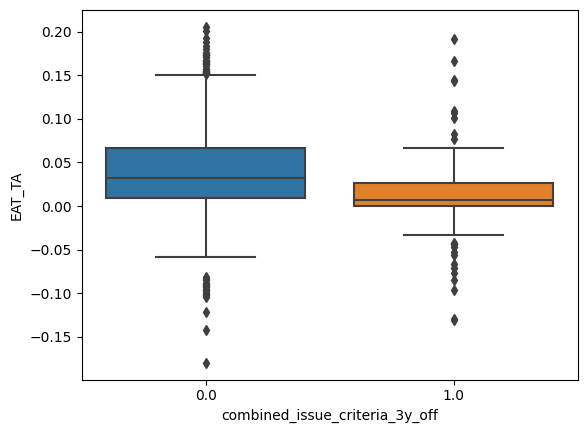

In [9]:

sns.boxplot(data = training_data_filled, x = 'combined_issue_criteria_3y_off', y = 'EAT_TA')

c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


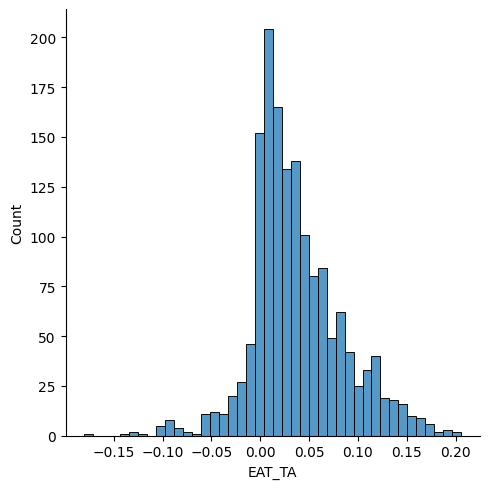

In [10]:
sns.displot(training_data_filled['EAT_TA'])